In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import time
import seaborn as sns


In [177]:
df = pd.read_csv("House_Rent_Dataset.csv")


In [178]:
df.nunique() 

Posted On              81
BHK                     6
Rent                  243
Size                  615
Floor                 480
Area Type               3
Area Locality        2235
City                    6
Furnishing Status       3
Tenant Preferred        3
Bathroom                8
Point of Contact        3
dtype: int64

In [179]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [180]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

# csutom Linear Regresion

In [181]:
x = df["Size"]/1000 #this is my feature
y = df["Rent"]/10000 # this is my target
y[:5]

0    1.00
1    2.00
2    1.70
3    1.00
4    0.75
Name: Rent, dtype: float64

prediction function (wx + b)


In [182]:
def linreg(w, x, b):
    yhat = (w * x) + b
    return yhat

Objective function/cost function   MSE 


In [183]:
def cost(yhat, y):
    m = y.shape[0]
    error = (yhat - y) ** 2
    cost = np.sum(error) / (2 * m)
    return cost


Gradient Descent

In [184]:
def gradient(w, x, b, y):
    m = y.shape[0]
    yhat = linreg(w, x, b)
    gw = np.sum((yhat-y)*x)/m
    gb = np.sum((yhat-y))/m
    
    return gw,gb


Update weight

In [185]:
def weight_update(w,x,b,y,lr,iteration):
    costs = []
    
    for i in range(iteration):
        yhat = linreg(w, x, b)
        cost_ = cost(yhat,y)
        gw, gb = gradient(w,x,b,y)
        w =w - (lr * gw)
        b = b -(lr * gb)
        costs.append(cost_)
    
    return costs


    

<Axes: title={'center': 'Error Vs Epochs'}, xlabel='Epochs', ylabel='Error'>

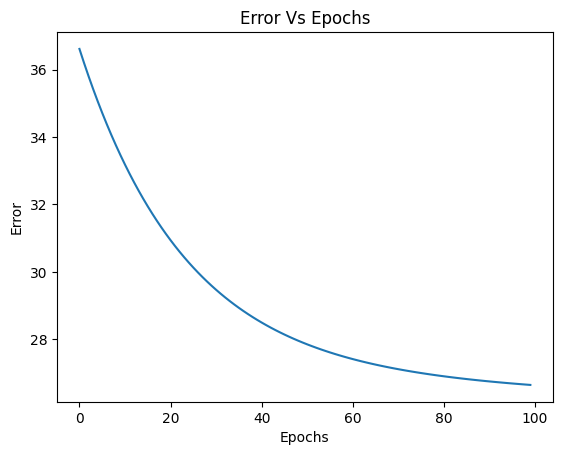

In [186]:
w=0
b=0
epoch = 100
lr = 0.01
erros = weight_update(w,x,b,y,lr,epoch)
plt.title("Error Vs Epochs")
plt.ylabel("Error")
plt.xlabel("Epochs")
sns.lineplot(x=range(epoch),y=erros)

In [187]:
start_time_lr = time.time()  
yhat = linreg(w, x, b)

r2 = r2_score(y, yhat)
end_time_lr=time.time()

training_time_lr= end_time_lr - start_time_lr
print(f"R2 Score: {r2}")

print(f"Training Time lr: {training_time_lr} seconds")


R2 Score: -0.20076670299750954
Training Time lr: 0.00115203857421875 seconds


# Compare the time taken and model performance with R2 score with sklearn.linear_models.LinearRegression


In [188]:
from sklearn.linear_model import LinearRegression
import time
df_learn = df.copy()


In [189]:
X_learn = df_learn["Size"].values.reshape(-1, 1) / 1000
y_learn = df_learn["Rent"].values / 10000

 Scikit-learn Linear Regression model train fit predict

In [190]:
sklearn_model = LinearRegression()
start_time = time.time()

sklearn_model.fit(X_learn, y_learn)
end_time = time.time()

y_pred = sklearn_model.predict(X_learn)
print(y_pred)


[4.17423662 2.64628734 3.66492019 ... 7.48479339 6.21150232 3.66492019]


In [191]:
r2_sklearn = r2_score(y_learn, y_pred)
print(r2_sklearn)

0.17102422962807484


In [192]:
total_time = end_time - start_time
print(f"Training Time sklearn: {total_time} seconds")


Training Time sklearn: 0.0010027885437011719 seconds
